## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_column', 100)

## Data Preparation and Evaluation

In [2]:
df = pd.read_csv('public_150k_plus_220703.csv')

In [3]:
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,Paid in Full,24,100,769358.78,769358.78,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,N,N,Existing or more than 2 years old,Sumter,SUMTER,SC,29150-9662,SC-05,62.0,325510.0,Unanswered,Unknown/NotStated,NaN,769358.78,NaN,NaN,NaN,NaN,NaN,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,Paid in Full,24,100,736927.79,736927.79,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,Y,Y,Existing or more than 2 years old,North Charleston,CHARLESTON,SC,29420-9000,SC-06,73.0,561730.0,White,Unknown/NotStated,NaN,736927.79,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,Paid in Full,24,100,691355.00,691355.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SEATTLE,KING,WA,98112-2922,WA-07,75.0,NaN,Unanswered,Unknown/NotStated,NaN,691355.00,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,Paid in Full,24,100,499871.00,499871.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-08,21.0,236115.0,American Indian or Alaska Native,Not Hispanic or Latino,NaN,499871.00,NaN,NaN,NaN,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,Paid in Full,24,100,367437.00,367437.00,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,NaN,NaN,NaN,NaN,NaN,25.0,484210.0,Unanswered,Unknown/NotStated,NaN,367437.00,NaN,NaN,NaN,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968532 entries, 0 to 968531
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   968532 non-null  int64  
 1   DateApproved                 968532 non-null  object 
 2   SBAOfficeCode                968532 non-null  int64  
 3   ProcessingMethod             968532 non-null  object 
 4   BorrowerName                 968528 non-null  object 
 5   BorrowerAddress              968518 non-null  object 
 6   BorrowerCity                 968520 non-null  object 
 7   BorrowerState                968519 non-null  object 
 8   BorrowerZip                  968519 non-null  object 
 9   LoanStatusDate               896656 non-null  object 
 10  LoanStatus                   968532 non-null  object 
 11  Term                         968532 non-null  int64  
 12  SBAGuarantyPercentage        968532 non-null  int64  
 13 

In [5]:
df.isna().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        4
BorrowerAddress                    14
BorrowerCity                       12
BorrowerState                      13
BorrowerZip                        13
LoanStatusDate                  71876
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  62
FranchiseName                  933127
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [6]:
df[df.BorrowerName.isna()]

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
2543,7594268606,03/24/2021,1084,PPS,NaN,104 Main Street,Dillingham,AK,99576,10/20/2021,Paid in Full,60,100,156767.42,156767.42,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,R,N,N,Existing or more than 2 years old,Dillingham,DILLINGHAM,AK,99576,AK-,9.0,424990.0,American Indian or Alaska Native,Not Hispanic or Latino,1.0,156765.42,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,157531.93,09/21/2021
143761,7629988807,04/22/2021,954,PPS,NaN,16275 Pomerado Rd,Poway,CA,92064-1826,NaN,Exemption 4,60,100,182492.00,182492.00,0.0,NaN,11822,"MUFG Union Bank, National Association",350 California St,SAN FRANCISCO,CA,94104,U,Y,N,Existing or more than 2 years old,Poway,SAN DIEGO,CA,92064-1826,CA-52,32.0,813110.0,Unanswered,Unknown/NotStated,1.0,182487.00,NaN,NaN,NaN,NaN,NaN,Corporation,11822,"MUFG Union Bank, National Association",SAN FRANCISCO,CA,Unanswered,Unanswered,NaN,NaN,NaN
622274,2062068710,03/28/2021,202,PPS,NaN,254 W 54th St Fl 11,New York,NY,10019-5516,02/19/2022,Paid in Full,60,100,632924.87,632924.87,0.0,NaN,224478,Signature Bank,"565 5th Ave, 12th Fl",NEW YORK CITY,NY,10017-2496,U,N,N,Existing or more than 2 years old,New York,NEW YORK,NY,10019-5516,NY-12,26.0,611710.0,Unanswered,Unknown/NotStated,1.0,632922.87,NaN,NaN,NaN,NaN,NaN,501(c)3 – Non Profit,224478,Signature Bank,NEW YORK CITY,NY,Unanswered,Unanswered,Y,638248.38,02/03/2022
724592,2036908502,02/19/2021,1086,PPS,NaN,5285 SE Mallard Way,Portland,OR,97222-4609,06/04/2022,Paid in Full,60,100,753847.50,753847.50,0.0,NaN,103648,Clackamas Community FCU,18600 SE McLoughlin Blvd,MILWAUKIE,OR,97267-6723,U,N,N,Existing or more than 2 years old,Portland,CLACKAMAS,OR,97222-4609,OR-05,96.0,624120.0,Unanswered,Unknown/NotStated,1.0,753841.50,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,103648,Clackamas Community FCU,MILWAUKIE,OR,Unanswered,Unanswered,Y,763306.74,05/31/2022


In [7]:
df = df[df.BorrowerName.notnull()]

In [8]:
df.isna().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        0
BorrowerAddress                    14
BorrowerCity                       12
BorrowerState                      13
BorrowerZip                        13
LoanStatusDate                  71875
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  62
FranchiseName                  933123
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [9]:
df[["BorrowerName","BorrowerAddress"]]

,BorrowerName,BorrowerAddress
0,"SUMTER COATINGS, INC.",2410 Highway 15 South
1,"PLEASANT PLACES, INC.",7684 Southrail Road
2,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E
3,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD
4,AERO BOX LLC,NaN
...,...,...
968527,"ROY E PAULSON, JR., P.C.",102 N. Kenwood
968528,"SWEETWATER COUNTY CHILD DEVELOPMENTAL CENTER, ...",1715 HITCHING POST DR
968529,ELECTRICAL SYSTEMS OF WYOMING INC,1105 Adon Rd
968530,EDEN LIFE CARE,30 N. Gould Street Suite 4000


In [10]:
df[df.BorrowerAddress.isnull()]

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,Paid in Full,24,100,367437.0,367437.0,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,NaN,NaN,NaN,NaN,NaN,25.0,484210.0,Unanswered,Unknown/NotStated,NaN,367437.0,NaN,NaN,NaN,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021
5,9774337701,05/01/2020,101,PPP,HUDSON EXTRUSIONS INC.,NaN,NaN,NaN,NaN,11/17/2021,Paid in Full,24,100,328840.0,328840.0,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,NaN,NaN,NaN,NaN,NaN,22.0,326199.0,Unanswered,Unknown/NotStated,NaN,328840.0,NaN,NaN,NaN,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,332137.41,05/10/2021
7,9722187702,05/01/2020,101,PPP,MIAMITOWN AUTO PARTS AND RECYCLING INC,NaN,NaN,NaN,NaN,02/24/2021,Paid in Full,24,100,272380.0,272380.0,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,NaN,NaN,NaN,NaN,NaN,19.0,423140.0,Unanswered,Unknown/NotStated,NaN,272380.0,NaN,NaN,NaN,NaN,NaN,Corporation,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,269416.44,01/25/2021
8,9725917702,05/01/2020,101,PPP,POPPYCOCKS INC,NaN,NaN,NaN,NaN,08/17/2021,Paid in Full,24,100,257088.0,257088.0,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,NaN,NaN,NaN,NaN,NaN,18.0,444220.0,Unanswered,Unknown/NotStated,NaN,257088.0,NaN,NaN,NaN,NaN,NaN,Subchapter S Corporation,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,259982.88,06/24/2021
9,9666867710,05/01/2020,101,PPP,CHURCH SQUARE PHARMACY INC,NaN,NaN,NaN,NaN,04/21/2021,Paid in Full,24,100,250000.0,250000.0,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,NaN,NaN,NaN,NaN,NaN,17.0,424210.0,Unanswered,Unknown/NotStated,NaN,250000.0,NaN,NaN,NaN,NaN,NaN,Corporation,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,252253.42,03/31/2021
10,9662697710,05/01/2020,101,PPP,"MILFAST INDUSTRIAL SUPPLY, INC",NaN,NaN,NaN,NaN,11/17/2021,Paid in Full,24,100,174046.0,174046.0,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Existing or more than 2 years old,NaN,NaN,NaN,NaN,NaN,18.0,423840.0,Unanswered,Unknown/NotStated,NaN,174046.0,NaN,NaN,NaN,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Female Owned,Non-Veteran,NaN,175643.41,04/06/2021
11,9724667708,05/01/2020,101,PPP,FERNANDINA BEACH HOTEL GROUP LLC,NaN,NaN,NaN,NaN,08/17/2021,Paid in Full,24,100,170170.0,170170.0,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,NaN,NaN,NaN,NaN,NaN,12.0,721110.0,Unanswered,Unknown/NotStated,NaN,170170.0,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,172263.32,07/29/2021
12,9672967701,05/01/2020,101,PPP,OTTAWA PRODUCTS CO INC,NaN,NaN,NaN,NaN,11/17/2021,Paid in Full,24,100,155010.0,155010.0,0.0,NaN,57328,The Huntington National

In [11]:
#Adding Year and Month From DateApproved and ForgivenessDate

df["Year_Approved"] = pd.DatetimeIndex(df.DateApproved).year
df["Month_Approved"] = pd.DatetimeIndex(df.DateApproved).month


df["Year_Forgiven"] = pd.DatetimeIndex(df.ForgivenessDate).year
df["Month_Forgiven"] = pd.DatetimeIndex(df.ForgivenessDate).month

In [12]:
df

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,Year_Approved,Month_Approved,Year_Forgiven,Month_Forgiven
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,Paid in Full,24,100,769358.78,769358.78,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,N,N,Existing or more than 2 years old,Sumter,SUMTER,SC,29150-9662,SC-05,62.0,325510.0,Unanswered,Unknown/NotStated,NaN,769358.78,NaN,NaN,NaN,NaN,NaN,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020,2020,5,2020.0,11.0
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,Paid in Full,24,100,736927.79,736927.79,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,Y,Y,Existing or more than 2 years old,North Charleston,CHARLESTON,SC,29420-9000,SC-06,73.0,561730.0,White,Unknown/NotStated,NaN,736927.79,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021,2020,5,2021.0,8.0
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,Paid in Full,24,100,691355.00,691355.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SEATTLE,KING,WA,98112-2922,WA-07,75.0,NaN,Unanswered,Unknown/NotStated,NaN,691355.00,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021,2020,5,2021.0,2.0
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,Paid in Full,24,100,499871.00,499871.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-08,21.0,236115.0,American Indian or Alaska Native,Not Hispanic or Latino,NaN,499871.00,NaN,NaN,NaN,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021,2020,5,2021.0,9.0
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,Paid in Full,24,100,367437.00,367437.00,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,NaN,NaN,NaN,NaN,NaN,25.0,484210.0,Unanswered,Unknown/NotStated,NaN,367437.00,NaN,NaN,NaN,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021,2020,5,2021.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968527,4395967002,04/03/2020,897,PPP,"ROY E PAULSON, JR., P.C.",102 N. Kenwood,CASPER,WY,82601-2724,01/13/2021,Paid in Full,24,100,150000.00,150000.00,0.0,NaN,42366,Platte Valley Bank,2201 Main St,TORRINGTON,WY,82240-2317,U,N,N,Existing or more than 2 years old,CASPER,NATRONA,WY,82601-2724,WY-,15.0,621210.0,Unanswered,Not Hispanic 

In [13]:
df.dtypes

LoanNumber                       int64
DateApproved                    object
SBAOfficeCode                    int64
ProcessingMethod                object
BorrowerName                    object
BorrowerAddress                 object
BorrowerCity                    object
BorrowerState                   object
BorrowerZip                     object
LoanStatusDate                  object
LoanStatus                      object
Term                             int64
SBAGuarantyPercentage            int64
InitialApprovalAmount          float64
CurrentApprovalAmount          float64
UndisbursedAmount              float64
FranchiseName                   object
ServicingLenderLocationID        int64
ServicingLenderName             object
ServicingLenderAddress          object
ServicingLenderCity             object
ServicingLenderState            object
ServicingLenderZip              object
RuralUrbanIndicator             object
HubzoneIndicator                object
LMIIndicator             

In [14]:
#Testing
df[(df.ProcessingMethod == 'PPP') & (df.LoanNumber != 9547507704)]

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,Year_Approved,Month_Approved,Year_Forgiven,Month_Forgiven
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,Paid in Full,24,100,736927.79,736927.79,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,Y,Y,Existing or more than 2 years old,North Charleston,CHARLESTON,SC,29420-9000,SC-06,73.0,561730.0,White,Unknown/NotStated,NaN,736927.79,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021,2020,5,2021.0,8.0
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,Paid in Full,24,100,691355.00,691355.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SEATTLE,KING,WA,98112-2922,WA-07,75.0,NaN,Unanswered,Unknown/NotStated,NaN,691355.00,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021,2020,5,2021.0,2.0
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,Paid in Full,24,100,499871.00,499871.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-08,21.0,236115.0,American Indian or Alaska Native,Not Hispanic or Latino,NaN,499871.00,NaN,NaN,NaN,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021,2020,5,2021.0,9.0
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,Paid in Full,24,100,367437.00,367437.00,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,NaN,NaN,NaN,NaN,NaN,25.0,484210.0,Unanswered,Unknown/NotStated,NaN,367437.00,NaN,NaN,NaN,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021,2020,5,2021.0,4.0
5,9774337701,05/01/2020,101,PPP,HUDSON EXTRUSIONS INC.,NaN,NaN,NaN,NaN,11/17/2021,Paid in Full,24,100,328840.00,328840.00,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,NaN,NaN,NaN,NaN,NaN,22.0,326199.0,Unanswered,Unknown/NotStated,NaN,328840.00,NaN,NaN,NaN,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,332137.41,05/10/2021,2020,5,2021.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968523,1641268700,03/27/2021,897,PPP,THERMAL TECHNOLOGY SERVICES LLC,30 N Gould St Ste R,Sheridan,WY,82801-6317,02/16/2022,Paid in Full,60,100,150000.00,150000.00,0.0,NaN,12096,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,SD,57104-6738,R,N,N,Existing or more than 2 years old,Sheridan,SHERIDAN,WY,82801-6317,WY-,12.0,424110.0,Unanswered,Unknown/NotSt

In [15]:
df[df.ProcessingMethod == 'PPP']

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,Year_Approved,Month_Approved,Year_Forgiven,Month_Forgiven
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,Paid in Full,24,100,769358.78,769358.78,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,N,N,Existing or more than 2 years old,Sumter,SUMTER,SC,29150-9662,SC-05,62.0,325510.0,Unanswered,Unknown/NotStated,NaN,769358.78,NaN,NaN,NaN,NaN,NaN,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020,2020,5,2020.0,11.0
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,Paid in Full,24,100,736927.79,736927.79,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,Y,Y,Existing or more than 2 years old,North Charleston,CHARLESTON,SC,29420-9000,SC-06,73.0,561730.0,White,Unknown/NotStated,NaN,736927.79,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021,2020,5,2021.0,8.0
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,Paid in Full,24,100,691355.00,691355.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SEATTLE,KING,WA,98112-2922,WA-07,75.0,NaN,Unanswered,Unknown/NotStated,NaN,691355.00,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021,2020,5,2021.0,2.0
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,Paid in Full,24,100,499871.00,499871.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-08,21.0,236115.0,American Indian or Alaska Native,Not Hispanic or Latino,NaN,499871.00,NaN,NaN,NaN,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021,2020,5,2021.0,9.0
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,Paid in Full,24,100,367437.00,367437.00,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,NaN,NaN,NaN,NaN,NaN,25.0,484210.0,Unanswered,Unknown/NotStated,NaN,367437.00,NaN,NaN,NaN,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021,2020,5,2021.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968523,1641268700,03/27/2021,897,PPP,THERMAL TECHNOLOGY SERVICES LLC,30 N Gould St Ste R,Sheridan,WY,82801-6317,02/16/2022,Paid in Full,60,100,150000.00,150000.00,0.0,NaN,12096,"Wells Fargo Bank, National Association",101 N Philips Ave,SIOUX FALLS,SD,57104-6738,R,N,N,Existing or more than 2 years old,Sheridan,SHERIDAN,WY,82801-6317

In [16]:
df[df.ProcessingMethod == 'PPS']

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,Year_Approved,Month_Approved,Year_Forgiven,Month_Forgiven
80,1305708310,01/16/2021,1084,PPS,FOUNTAINHEAD DEVELOPMENT INC,1501 Queens Way,Fairbanks,AK,99701-7456,03/10/2022,Paid in Full,60,100,2000000.0,2000000.0,0.0,NaN,3495,Denali State Bank,119 N Cushman St,FAIRBANKS,AK,99701-2879,R,Y,N,Existing or more than 2 years old,Fairbanks,FAIRBANKS NORTH STAR,AK,99701-7456,AK-,140.0,721110.0,Unanswered,Unknown/NotStated,1.0,1999995.0,NaN,NaN,NaN,NaN,NaN,Subchapter S Corporation,3495,Denali State Bank,FAIRBANKS,AK,Male Owned,Unanswered,NaN,2020666.67,02/02/2022,2021,1,2022.0,2.0
81,1528398702,03/27/2021,1084,PPS,NORTHERN ENERGY SERVICES LLC,6250 S Airpark Pl,Anchorage,AK,99502-1865,NaN,Exemption 4,60,100,2000000.0,2000000.0,0.0,NaN,116975,Northrim Bank,3111 'C' St,ANCHORAGE,AK,99503,U,N,N,Existing or more than 2 years old,Anchorage,ANCHORAGE,AK,99502-1865,AK-,204.0,237310.0,Unanswered,Unknown/NotStated,NaN,2000000.0,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),116975,Northrim Bank,ANCHORAGE,AK,Unanswered,Unanswered,NaN,NaN,NaN,2021,3,NaN,NaN
82,2340468702,03/28/2021,1084,PPS,WHITTIER SEAFOOD LLC,375 E WHITTIER ST,WHITTIER,AK,99693,NaN,Exemption 4,60,100,2000000.0,2000000.0,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,R,N,N,Existing or more than 2 years old,WHITTIER,Chugach,AK,99693,AK-,216.0,114111.0,White,Not Hispanic or Latino,1.0,1999999.0,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,NaN,NaN,2021,3,NaN,NaN
83,2524238501,02/20/2021,1084,PPS,ALCAN ELECTRICAL AND ENGINEERING INC,6670 Arctic Spur Rd,Anchorage,AK,99518-1548,10/13/2021,Paid in Full,60,100,2000000.0,2000000.0,0.0,NaN,116975,Northrim Bank,3111 'C' St,ANCHORAGE,AK,99503,U,N,N,Existing or more than 2 years old,Anchorage,ANCHORAGE,AK,99518-1548,AK-,92.0,238210.0,Unanswered,Unknown/NotStated,1.0,1999998.0,NaN,NaN,NaN,NaN,NaN,Subchapter S Corporation,116975,Northrim Bank,ANCHORAGE,AK,Unanswered,Unanswered,NaN,2011342.47,09/20/2021,2021,2,2021.0,9.0
84,3041178300,01/21/2021,1084,PPS,FAMILY CENTERED SERVICES OF ALASKA INC,1825 Marika Rd,Fairbanks,AK,99709-5521,04/08/2022,Paid in Full,60,100,2000000.0,2000000.0,0.0,NaN,116975,Northrim Bank,3111 'C' St,ANCHORAGE,AK,99503,R,N,N,Existing or more than 2 years old,Fairbanks,FAIRBANKS NORTH STAR,AK,99709-5521,AK-,169.0,624190.0,Unanswered,Unknown/NotStated,NaN,2000000.0,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,116975,Northrim Bank,ANCHORAGE,AK,Unanswered,Unanswered,Y,2023068.49,03/28/2022,2021,1,2022.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968522,1177298301,01/16/2021,897,PPS,"ROY E PAULSON, JR., P.C.",102 N Kenwood St,Casper,WY,82601-2724,08/07/2021,Paid in Full,60,100,150000.0,150000.0,0.0,NaN,42366,Platte Valley Bank,2201 Main St,TORRINGTON,WY,82240-2317,U,N,N,Existing or more than 2 years old,Casper,NATRONA,WY,82601-2724,WY-,16.0,621210.0,Unanswered

In [17]:
df[['LoanNumber','DateApproved']]

,LoanNumber,DateApproved
0,9547507704,05/01/2020
1,9777677704,05/01/2020
2,5791407702,05/01/2020
3,6223567700,05/01/2020
4,9662437702,05/01/2020
...,...,...
968527,4395967002,04/03/2020
968528,6985647108,04/14/2020
968529,7996438405,02/12/2021
968530,9054647103,04/15/2020


## Categorical Variables

### Univariate

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


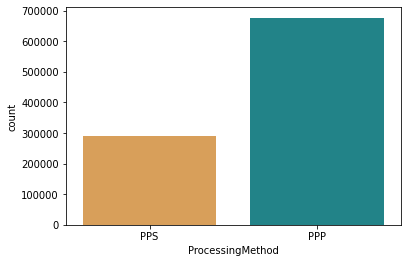

In [18]:
## Count how many records are there in Processing Methods
sns.countplot(df.ProcessingMethod, palette=['#eda145',"#119299"], order = reversed(df.ProcessingMethod.value_counts().index));

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


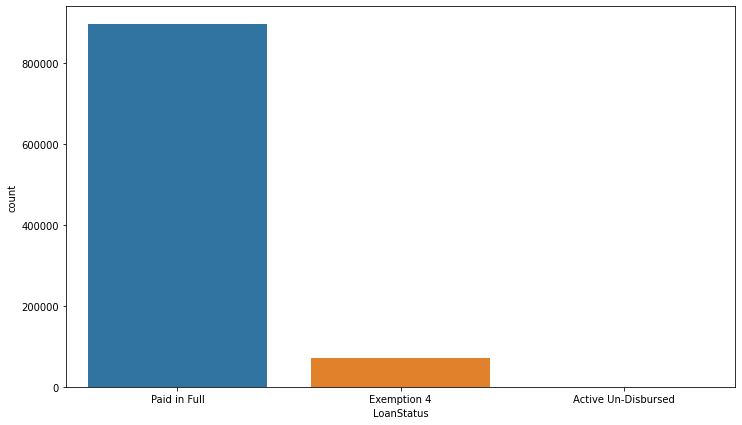

In [19]:
## Count how many records are there in Loan Status
plt.figure(figsize=(12,7))
sns.countplot(df.LoanStatus);

In [20]:
df.LoanStatus.value_counts(ascending=False)

Paid in Full           896641
Exemption 4             71875
Active Un-Disbursed        12
Name: LoanStatus, dtype: int64

In [21]:
df.BorrowerState.value_counts(ascending=False)

CA    130614
TX     76184
NY     74109
FL     60036
IL     40814
PA     38535
OH     32646
NJ     32534
MI     29801
MA     27473
GA     25832
WA     23753
VA     23268
NC     22828
CO     19743
MN     19729
MD     18978
WI     17353
IN     16600
MO     16350
TN     15869
AZ     15794
LA     13668
OR     13455
CT     12892
AL     10912
SC     10742
OK      9997
UT      9294
KY      9178
IA      8295
NV      8261
KS      8202
AR      5857
NE      5804
MS      5502
NH      5078
HI      4980
NM      4484
ID      4416
DC      4399
ME      4185
RI      3792
WV      3365
ND      3222
MT      3144
DE      2996
PR      2952
SD      2695
AK      2662
VT      2269
WY      2139
GU       443
VI       290
MP        82
AS        20
Name: BorrowerState, dtype: int64

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


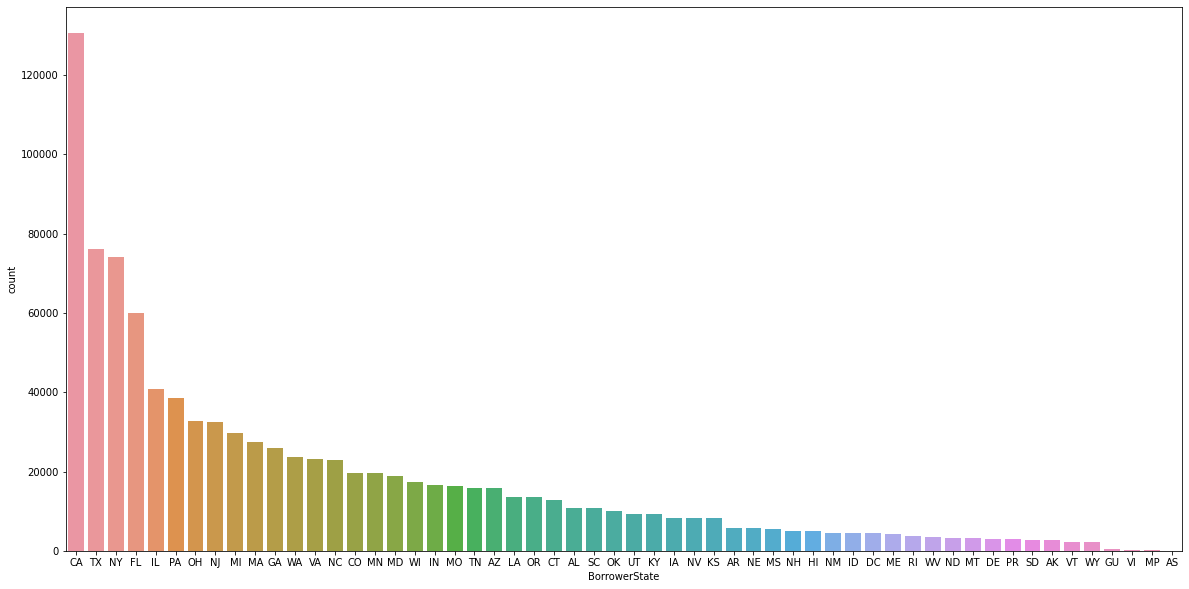

In [22]:

## Count how many records are there in Borrower States

plt.figure(figsize=(20,10))
sns.countplot(df.BorrowerState, order = df.BorrowerState.value_counts().index);


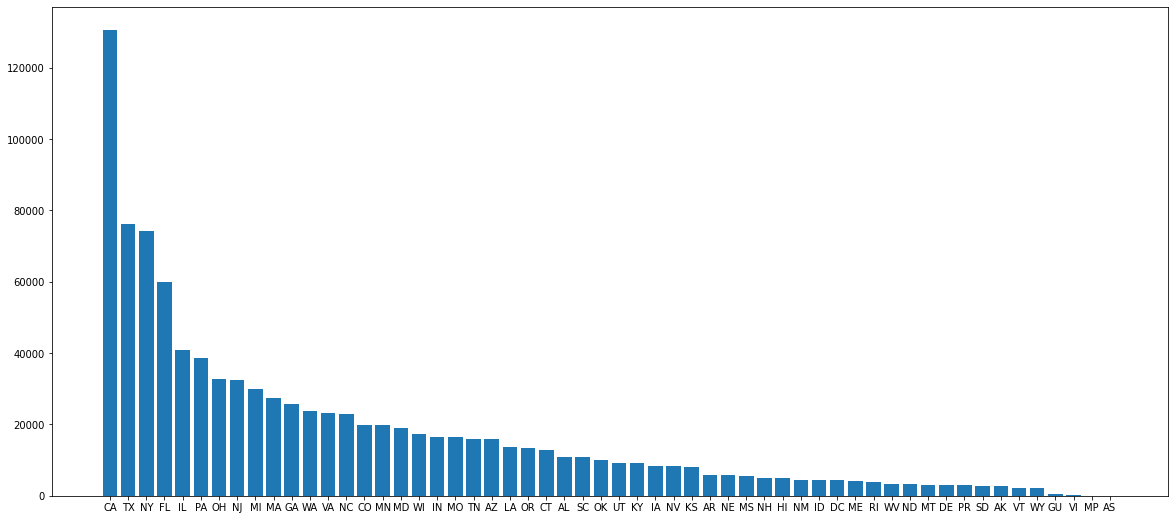

In [23]:
plt.figure(figsize=(20,9))

plt.bar(df.BorrowerState.value_counts().index, df.BorrowerState.value_counts().values);


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


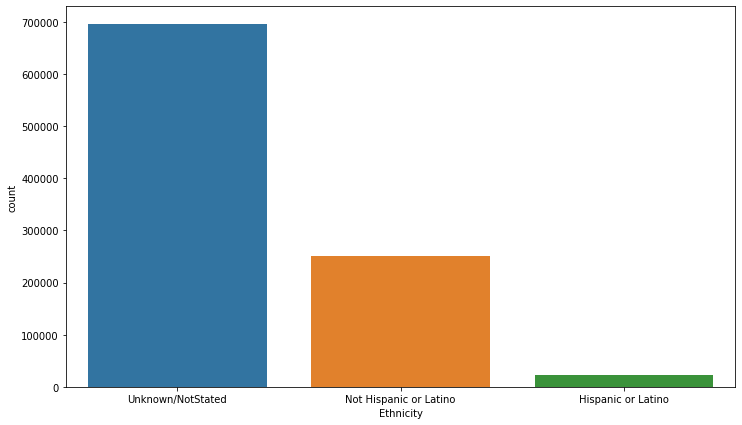

In [24]:

## Count how many records are there in Borrower States

plt.figure(figsize=(12,7))
sns.countplot(df.Ethnicity);


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


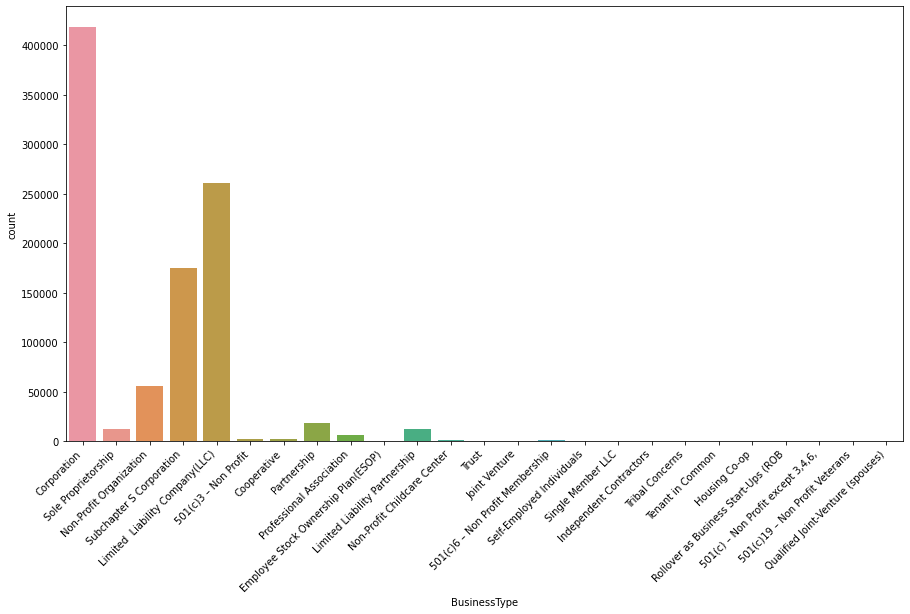

In [25]:
## Count how many records are there in Business Types

plt.figure(figsize=(15,8))
ax = sns.countplot("BusinessType", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')
plt.show()

In [26]:
df.Race.value_counts()

Unanswered                                   775365
White                                        157539
Asian                                         21408
Black or African American                      7421
American Indian or Alaska Native               6112
Native Hawaiian or Other Pacific Islander       646
Puerto Rican                                     31
Multi Group                                       5
Eskimo & Aleut                                    1
Name: Race, dtype: int64

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


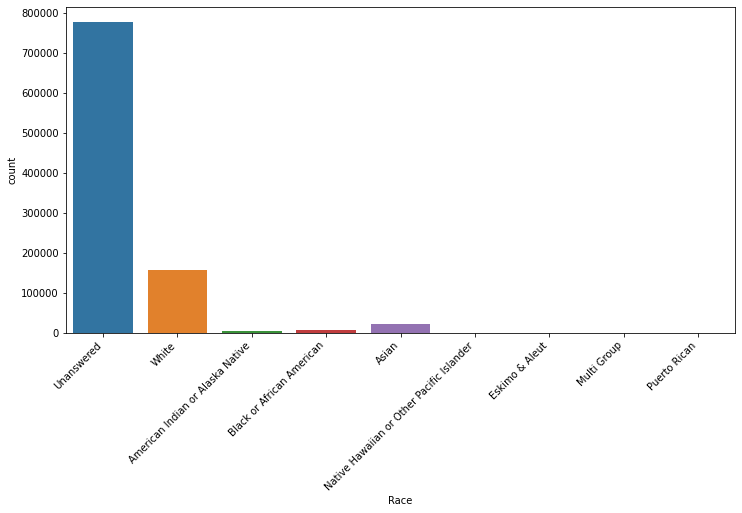

In [27]:
## Count how many records are there in Business Types

plt.figure(figsize=(12,6))
ax = sns.countplot("Race", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')
plt.show()

### Bivariate

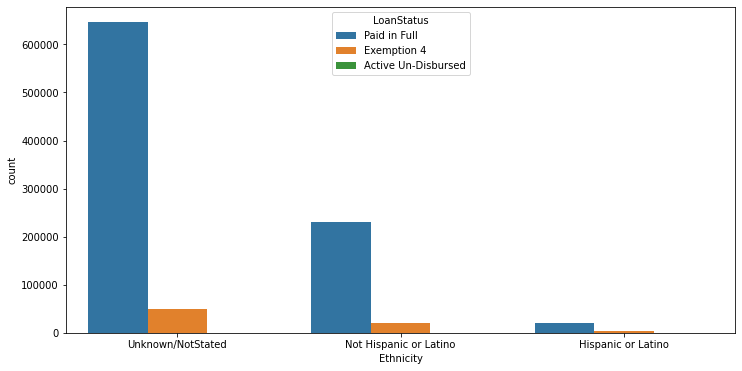

In [28]:
plt.figure(figsize=(12,6))

sns.countplot(x= df.Ethnicity, hue= df.LoanStatus);

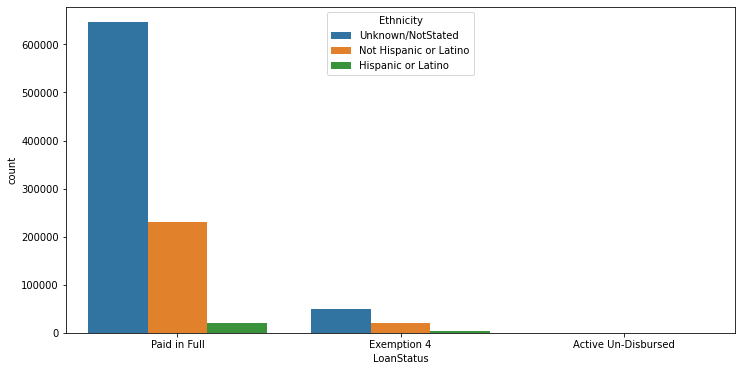

In [29]:
plt.figure(figsize=(12,6))

sns.countplot(x= df.LoanStatus, hue= df.Ethnicity);

In [30]:
#CROSS TABULATION

pd.crosstab(df.LoanStatus,df.Ethnicity)

Ethnicity,Hispanic or Latino,Not Hispanic or Latino,Unknown/NotStated
LoanStatus,,,
Active Un-Disbursed,0,7,5
Exemption 4,3061,19624,49190
Paid in Full,20034,230424,646183


In [31]:
pd.crosstab(index = df.Ethnicity, columns = df.BorrowerState)

BorrowerState,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,FL,GA,GU,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MP,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
Ethnicity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Hispanic or Latino,45,49,55,0,450,5863,463,167,97,36,3218,390,4,93,70,56,631,96,71,59,152,437,247,16,196,146,119,2,33,11,168,23,55,34,517,470,278,1227,235,127,196,231,993,79,47,8,114,3971,149,325,8,6,407,103,26,26
Not Hispanic or Latino,689,3230,1521,1,3578,36338,5047,3295,905,859,11538,6751,152,1321,3084,1037,10346,4963,2339,2587,3045,8188,4402,1144,7860,6567,4766,32,2012,1092,3941,1409,2134,1389,6994,963,2161,17468,11826,2665,3241,9959,42,1266,2149,874,3388,18788,2628,4690,87,555,6039,5050,1018,641
Unknown/NotStated,1928,7633,4281,19,11766,88413,14233,9430,3397,2101,45280,18691,287,3566,5141,3323,29837,11541,5792,6532,10471,18848,14329,3025,21745,13016,11465,48,3457,2041,18719,1790,3615,3655,25023,3051,5822,55414,20585,7205,10018,28345,1917,2447,8546,1813,12367,53425,6517,18253,195,1708,17307,12200,2321,1472


## Numerical Variables

In [32]:
df

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,Year_Approved,Month_Approved,Year_Forgiven,Month_Forgiven
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,Paid in Full,24,100,769358.78,769358.78,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,N,N,Existing or more than 2 years old,Sumter,SUMTER,SC,29150-9662,SC-05,62.0,325510.0,Unanswered,Unknown/NotStated,NaN,769358.78,NaN,NaN,NaN,NaN,NaN,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020,2020,5,2020.0,11.0
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,Paid in Full,24,100,736927.79,736927.79,0.0,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,Y,Y,Existing or more than 2 years old,North Charleston,CHARLESTON,SC,29420-9000,SC-06,73.0,561730.0,White,Unknown/NotStated,NaN,736927.79,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021,2020,5,2021.0,8.0
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,Paid in Full,24,100,691355.00,691355.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SEATTLE,KING,WA,98112-2922,WA-07,75.0,NaN,Unanswered,Unknown/NotStated,NaN,691355.00,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021,2020,5,2021.0,2.0
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,Paid in Full,24,100,499871.00,499871.00,0.0,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-08,21.0,236115.0,American Indian or Alaska Native,Not Hispanic or Latino,NaN,499871.00,NaN,NaN,NaN,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021,2020,5,2021.0,9.0
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,Paid in Full,24,100,367437.00,367437.00,0.0,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,NaN,NaN,NaN,NaN,NaN,25.0,484210.0,Unanswered,Unknown/NotStated,NaN,367437.00,NaN,NaN,NaN,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021,2020,5,2021.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968527,4395967002,04/03/2020,897,PPP,"ROY E PAULSON, JR., P.C.",102 N. Kenwood,CASPER,WY,82601-2724,01/13/2021,Paid in Full,24,100,150000.00,150000.00,0.0,NaN,42366,Platte Valley Bank,2201 Main St,TORRINGTON,WY,82240-2317,U,N,N,Existing or more than 2 years old,CASPER,NATRONA,WY,82601-2724,WY-,15.0,621210.0,Unanswered,Not Hispanic 

In [33]:
## Descriptive Summary

df.CurrentApprovalAmount.describe()

count    9.685280e+05
mean     5.306222e+05
std      7.378880e+05
min      1.500000e+05
25%      2.004000e+05
50%      2.950000e+05
75%      5.393815e+05
max      1.000000e+07
Name: CurrentApprovalAmount, dtype: float64

## Outliers

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


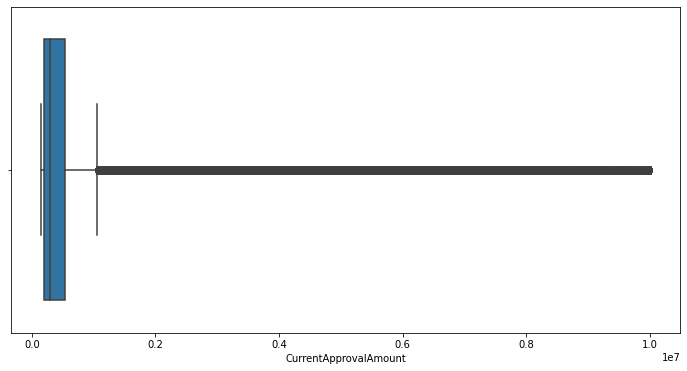

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(df.CurrentApprovalAmount);

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


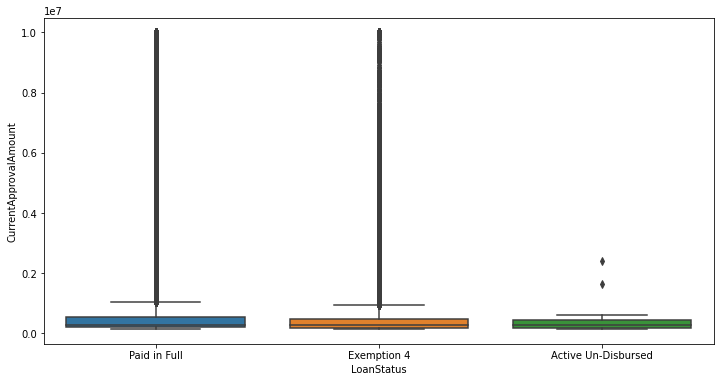

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(df.LoanStatus,df.CurrentApprovalAmount);

c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CurrentApprovalAmount', ylabel='Density'>

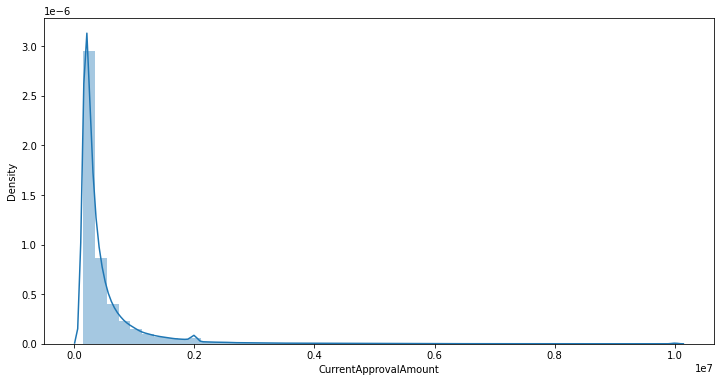

In [36]:
plt.figure(figsize=(12,6))
sns.distplot(df.CurrentApprovalAmount)

c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CurrentApprovalAmount'>

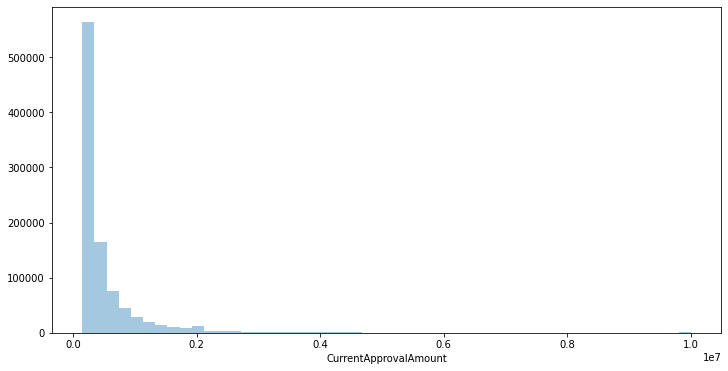

In [37]:
plt.figure(figsize=(12,6))
sns.distplot(df.CurrentApprovalAmount, norm_hist=False, kde=False )

## Correlation

In [38]:
df.CurrentApprovalAmount.skew()

5.759147252515778

In [39]:
df.CurrentApprovalAmount.kurt()

48.973897585699746

In [40]:
matrix = df.copy()

<AxesSubplot:>

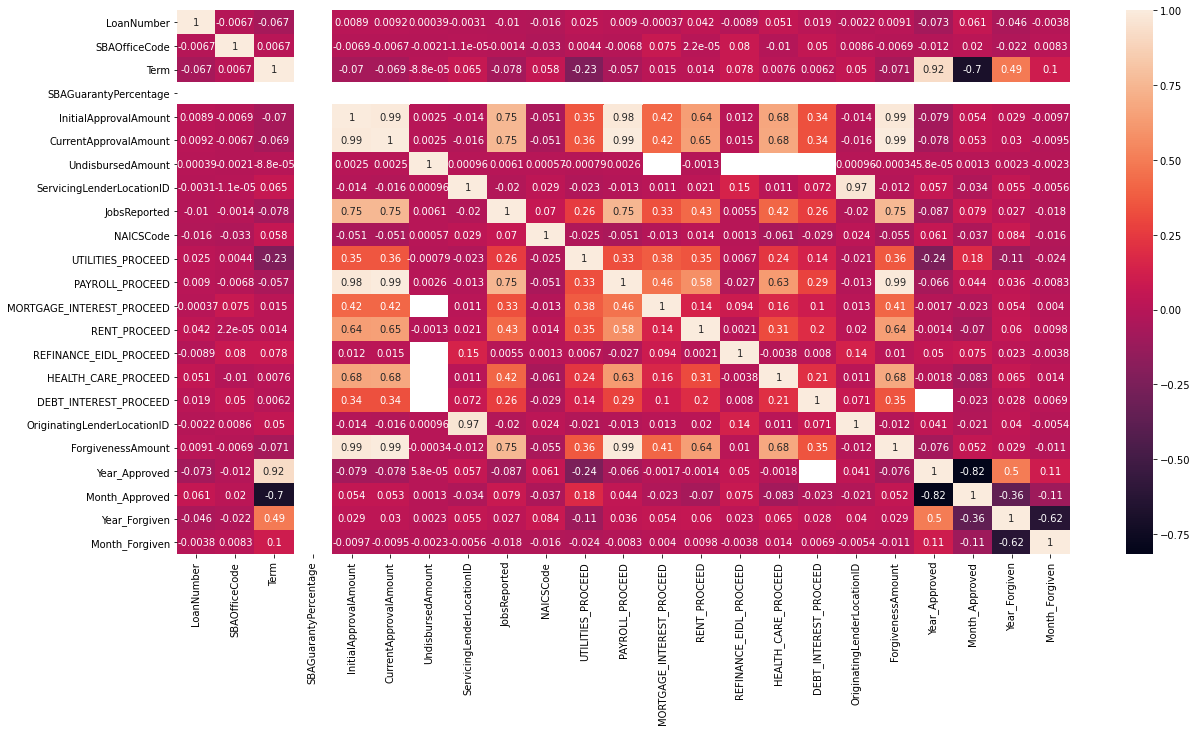

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(matrix.corr(), annot = True)